In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mosapabdelghany/medical-insurance-cost-dataset")

print("Path to dataset files:", path)

C:\Users\777\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\777\.cache\kagglehub\datasets\mosapabdelghany\medical-insurance-cost-dataset\versions\1


In [2]:
import os
import pandas as pd

# List the files to see what's inside the downloaded folder
print(os.listdir(path))

['insurance.csv']


In [3]:
df = pd.read_csv(os.path.join(path, "insurance.csv"))
print(df.head(10))

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
5   31  female  25.740         0     no  southeast   3756.62160
6   46  female  33.440         1     no  southeast   8240.58960
7   37  female  27.740         3     no  northwest   7281.50560
8   37    male  29.830         2     no  northeast   6406.41070
9   60  female  25.840         0     no  northwest  28923.13692


In [4]:
print(df.info())
print(df.describe())
print(df.isnull().sum())  # check for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max

In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

df_label = df.copy()


categorical_cols = ["sex", "smoker", "region"]


le = LabelEncoder()
for col in categorical_cols:
    df_label[col] = le.fit_transform(df_label[col])


X = df_label.drop("charges", axis=1)
y = df_label["charges"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print("RMSE:", rmse)
print("R² Score:", r2)

Model Performance:
RMSE: 5799.587091438356
R² Score: 0.7833463107364539


In [9]:

sample = pd.DataFrame({
    "age": [30],
    "sex": [1],       # 1 = male, 0 = female
    "bmi": [28.5],
    "children": [2],
    "smoker": [0],    # 1 = yes, 0 = no
    "region": [2]     # northeast=0, northwest=1, southeast=2, southwest=3
})

predicted_cost = model.predict(sample)
print("Predicted Insurance Cost:", predicted_cost[0])

Predicted Insurance Cost: 5623.676758595286


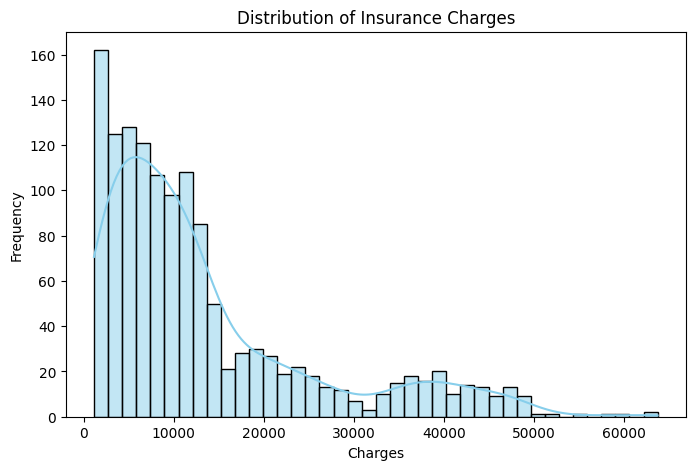

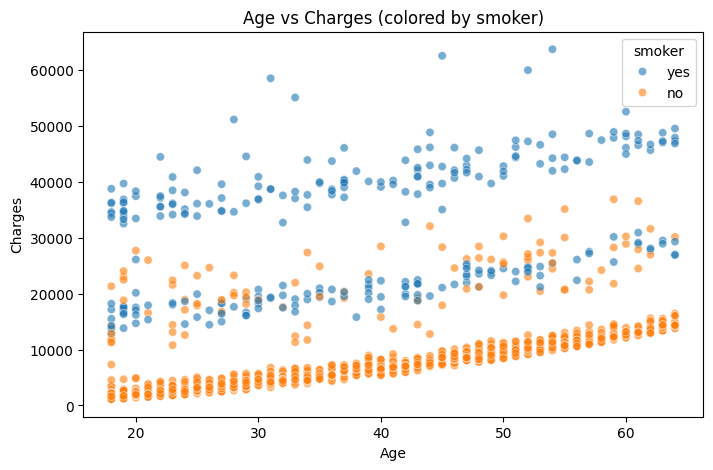

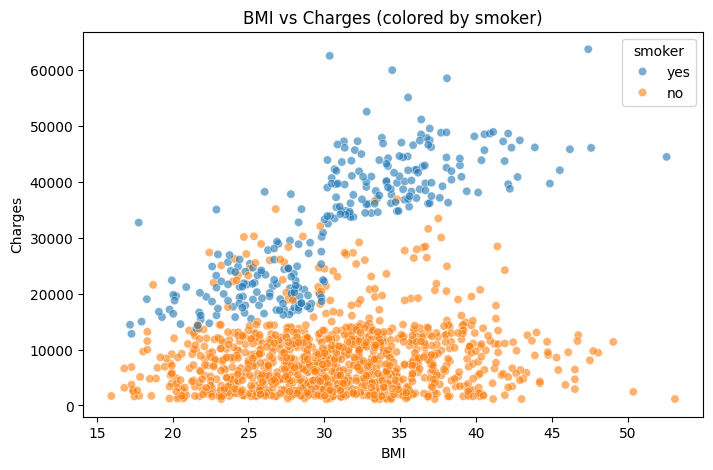

C:\Users\777\AppData\Local\Temp\ipykernel_186684\4058960854.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="smoker", y="charges", data=df, palette="Set2")


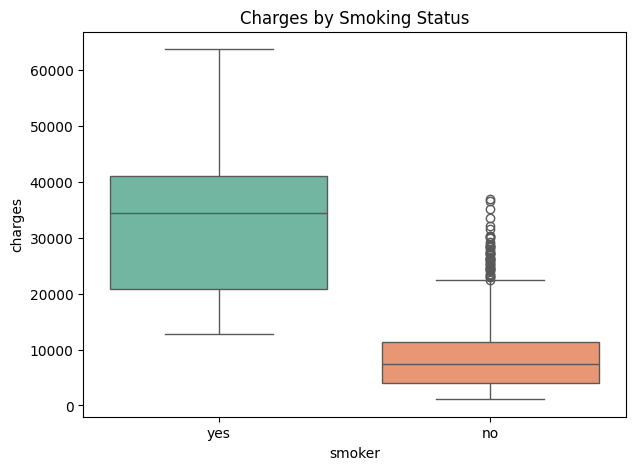

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# === 1) Distribution of charges ===
plt.figure(figsize=(8,5))
sns.histplot(df['charges'], bins=40, kde=True, color="skyblue")
plt.title("Distribution of Insurance Charges")
plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.show()

# === 2) Age vs Charges ===
plt.figure(figsize=(8,5))
sns.scatterplot(x="age", y="charges", data=df, hue="smoker", alpha=0.6)
plt.title("Age vs Charges (colored by smoker)")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()

# === 3) BMI vs Charges ===
plt.figure(figsize=(8,5))
sns.scatterplot(x="bmi", y="charges", data=df, hue="smoker", alpha=0.6)
plt.title("BMI vs Charges (colored by smoker)")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.show()

# === 4) Charges by Smoker ===
plt.figure(figsize=(7,5))
sns.boxplot(x="smoker", y="charges", data=df, palette="Set2")
plt.title("Charges by Smoking Status")
plt.show()

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


rf_model = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    max_depth=None
)


rf_model.fit(X_train, y_train)


y_pred_rf = rf_model.predict(X_test)


rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Performance:")
print("RMSE:", rmse_rf)
print("R² Score:", r2_rf)

Random Forest Performance:
RMSE: 4570.976756306445
R² Score: 0.8654170742271029
